## Analysis 1 

### **we will analyse the spotify and amazon dataset to get a overview of the data**

#### **Data Need**
        Load the product details, Ablum details, Artist details file which are obtained from amazon and spotify

- ## Finding - 1

We are trying the find wether the artist gener really plays a import role in the popularity ?

        - We are finding the Top 10 artist based on the follower
        - We are finding the Top 10 artist based on the Popularity
        - We are finding the gener of the artist who fall on the top based on the follower and popularity
        - We are finding the 10 gener of all time  


- ## Finding - 2

We are trying to get a find out the trends in reivew over the period of time   

        - We are finding the Top 10 reivew company based on the number of review they have writen
        - We are finding the variation in the review over the period of time 
        

- ## Finding - 3

We are trying to get a overall idea about who are the top production compay for music and the oversll market avaliablity of the albums  


        - We are finding the Top 10 production company based on the number of ablums they have produced
        - We are finding the Top 10 country for which the  market avalibality is high
        
        


In [2]:
#wE ARE IMPORTING THE NECESSARY FILE 
import pandas as pd
import os
from operator import itemgetter # Importing the itemgetter
from datetime import datetime
from dateutil.parser import parse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import mpld3

In [4]:
# WE ARE SETTING THE DIRECTORY PATH TO READ THE DATA
Root_path=os.getcwd()
data= "Data"
Data= os.path.join(Root_path,data) # we are joining the old with new value to form a new path 
review_details_file="Final_Reviews.csv"
Data_review_details= os.path.join(Data,review_details_file) # we are joining the old with new value to form a new path 

path_album_details="Spotify_Album_complete_details.csv"
Data_album_details= os.path.join(Data,path_album_details) # we are joining the old with new value to form a new path 

path_artist_details="Spotify_Artist_CompleteS_details.csv"
Data_artist_details= os.path.join(Data,path_artist_details) # we are joining the old with new value to form a new path 

path_product_details="meta_Digital_Music.csv"
Data_product_details= os.path.join(Data,path_product_details) # we are joining the old with new value to form a new path 


path_country_details="countries_code.csv"
Data_country_details= os.path.join(Data,path_country_details) # we are joining the old with new value to form a new path 


In [5]:
# We are loading the data into the system 
artist_details = pd.DataFrame.from_csv(Data_artist_details, encoding = "ISO-8859-1").reset_index()
album_details = pd.DataFrame.from_csv(Data_album_details, encoding = "ISO-8859-1").reset_index()
review_details = pd.DataFrame.from_csv(Data_review_details, encoding = "ISO-8859-1").reset_index()
product_details = pd.DataFrame.from_csv(Data_product_details, encoding = "ISO-8859-1").reset_index()
country_details = pd.DataFrame.from_csv(Data_country_details, encoding = "ISO-8859-1").reset_index()


C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# Finding the Artist with most No of follower 


In [9]:
Artist_followers =  artist_details.sort_values(['Artist_followers'], ascending=[False])
Artist_followers_sorted =Artist_followers[["Artist_name","Artist_followers"]].copy().reset_index()
Artist_followers_sorted_top =Artist_followers_sorted.head(10)

In [10]:
Artist_followers_sorted_top

,index,Artist_name,Artist_followers
0,11992,Rihanna,9882593
1,8050,Drake,9550955
2,2642,David Guetta,8473946
3,15452,Eminem,7949903
4,133,Maroon 5,7753799
5,9280,Coldplay,7118430
6,14625,Beyoncé,6573488
7,8861,One Direction,6348899
8,15380,Calvin Harris,5982108
9,12909,Ariana Grande,5881168


# Finding the Artist with most No of popularity


In [13]:
Artist_popularity =  artist_details.sort_values(['Artist_popularity'], ascending=[False])
Artist_popularity_sorted =Artist_popularity[["Artist_name","Artist_popularity"]].copy()
Artist_popularity_sorted_top =Artist_popularity_sorted.head(10)

In [14]:
Artist_popularity_sorted_top

,Artist_name,Artist_popularity
8050,Drake,100
13025,The Chainsmokers,93
9280,Coldplay,90
11992,Rihanna,90
11622,Kanye West,89
15452,Eminem,88
12909,Ariana Grande,87
468,Selena Gomez,87
3939,J Balvin,87
461,Big Sean,87


# Finding the relation between follower and popularity

In [15]:
Relation_table = pd.merge(Artist_followers_sorted_top,Artist_popularity_sorted_top , on="Artist_name")

In [16]:
Top_Artist_followers_populatity=Relation_table.head(10)

In [17]:
Top_Artist_followers_populatity

,index,Artist_name,Artist_followers,Artist_popularity
0,11992,Rihanna,9882593,90
1,8050,Drake,9550955,100
2,15452,Eminem,7949903,88
3,9280,Coldplay,7118430,90
4,12909,Ariana Grande,5881168,87


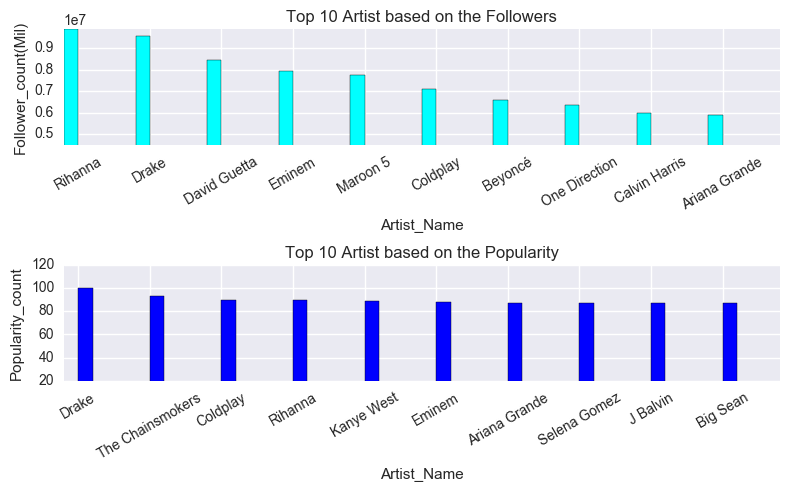

In [18]:
# plotting the grahp
Artist_followers = Artist_followers_sorted_top['Artist_followers']

Artist_popularity = Artist_popularity_sorted_top['Artist_popularity']
Artist_name1 = Artist_followers_sorted_top['Artist_name']
Artist_name2 = Artist_popularity_sorted_top['Artist_name']


fig = plt.figure(figsize=(8,5))
fig.add_subplot(2,1,1)
x = np.arange(len(Artist_name1))
bar_width = 0.2
opacity = 0.8 
plt.bar(x, Artist_followers,bar_width, color='cyan', label='Followers')
plt.xlabel('Artist_Name')
plt.ylabel('Follower_count(Mil)')
plt.title("Top 10 Artist based on the Followers")
plt.xticks(x+bar_width,Artist_name1, rotation=30)
plt.ylim([4500000,9900000])

plt.tight_layout()


fig.add_subplot(2,1,2)
x = np.arange(len(Artist_name2))
bar_width = 0.2
opacity = 0.8

plt.bar(x+bar_width, Artist_popularity,bar_width, color='blue', label='Popularity')
plt.xlabel('Artist_Name')
plt.ylabel('Popularity_count')
plt.title("Top 10 Artist based on the Popularity")
plt.xticks(x+bar_width,Artist_name2, rotation=30)
plt.ylim(20,120)
plt.tight_layout()
plt.show()

# Finding the Over all distrubution of geners 

In [19]:
# loading of data 
artist_details_gener= pd.DataFrame(artist_details[artist_details.Artist_genres.notnull()].reset_index())
gener_series= artist_details_gener.Artist_genres

In [20]:
# function to loop thru all the gener and append it to list 
gener_list= []
for i in range(0,len(gener_series)):
    conv= str(gener_series[i])
    a=conv.split("-")
    for n in range(0,len(a)):
        b= a[n]
        gener_list.append(b)

In [21]:
# function to loop thru the list and append it to dict 
gener_dic ={}
for word in gener_list: 
    word = word.strip()
    if word not in gener_dic:
        gener_dic [word] = 1   # Adding to the dictionary if the words are not present 
    else:
        gener_dic[word] += 1  # incrementing the count if the are present in the  dictionary 

In [22]:
sorting_gener = sorted(gener_dic.items(), key=itemgetter(1),reverse=True) 
# using the item getter to sort the dictionary based on the value in descending order 

In [23]:
# appending it to list 
gener_name=[]
gener_value=[]
for i in range(0,8):
    a= sorting_gener[i]
    gener_name.append(a[0])
    gener_value.append(a[1])

In [24]:
# Loading the data frame 
Gener_Name_Count = pd.DataFrame({"Gener_Name" :gener_name,"Gener_Count":gener_value})

In [25]:
Gener_Name = Gener_Name_Count['Gener_Name'] # x axis for first graph
Gener_Count = Gener_Name_Count['Gener_Count']
explodegrpah =[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0]


# Top gener for each artist 

In [28]:
artist_details_geners= pd.DataFrame(artist_details[artist_details.Artist_genres.notnull()].reset_index())
Artist_and_gener =artist_details_geners[["Artist_name","Artist_genres"]].copy()
Artist_gener= Artist_and_gener.groupby('Artist_name').agg(lambda x: ''.join(set(x))).reset_index()

gener_Artist_name= Artist_gener.Artist_name

gener_Artist_genres= Artist_gener.Artist_genres

In [30]:
#fUNCTION TO LOAD THE DATA 
gener_list= []
Topgener_by_artict=[]
gener_dic_artist={}
frame_gener = []
frame_artistname =[]
for i in range(0,len(gener_Artist_genres)):
    name = gener_Artist_name[i]
    conv= str(gener_Artist_genres[i])
    a=conv.split("-")
    for n in range(0,len(a)):
        b= a[n]
        gener_list.append(b)
    for word in gener_list: 
        word = word.strip()
        if word not in gener_dic_artist:
            gener_dic_artist [word] = 1   # Adding to the dictionary if the words are not present 
        else:
            gener_dic_artist[word] += 1  # incrementing the count if the are present in the  dictionary 
    sort_gener_dic_artist = sorted(gener_dic_artist.items(), key=itemgetter(1),reverse=True) 
    topgener = sort_gener_dic_artist[0][0]
    Topgener_by_artict.append(topgener)
    
    frame_gener.append(topgener)
    frame_artistname.append(name)
    
    gener_list= []
    gener_dic_artist={}


In [33]:
# CRAETING A DATA FRAM TO PLOT THE GRAP 
Artist_top_gener = pd.DataFrame({"Artist_name" :frame_artistname,"Geners":frame_gener})
Top_Artist_followers_populatity_gener = pd.merge(Top_Artist_followers_populatity,Artist_top_gener , on="Artist_name")
Top_Artist_f_p_gener_PERCEDNT = Top_Artist_followers_populatity_gener

In [34]:
followers_sum= Top_Artist_followers_populatity_gener["Artist_followers"].sum()
Top_Artist_f_p_gener_PERCEDNT["Artist_followers_in_percent"] = round((Top_Artist_followers_populatity_gener["Artist_followers"]/followers_sum)*100)
popularity_sum= Top_Artist_followers_populatity_gener["Artist_popularity"].sum()
Top_Artist_f_p_gener_PERCEDNT["Artist_popularity_in_percent"] = round((Top_Artist_followers_populatity_gener["Artist_popularity"]/popularity_sum)*100)


In [35]:
Top_Artist_f_p_gener_PERCEDNT

,index,Artist_name,Artist_followers,Artist_popularity,Geners,Artist_followers_in_percent,Artist_popularity_in_percent
0,11992,Rihanna,9882593,90,pop,24.0,20.0
1,8050,Drake,9550955,100,pop rap,24.0,22.0
2,15452,Eminem,7949903,88,pop rap,20.0,19.0
3,9280,Coldplay,7118430,90,pop,18.0,20.0
4,12909,Ariana Grande,5881168,87,pop,15.0,19.0


In [36]:

Top_Artist_f_p_gener_PERCEDNT["Artist&Geners"]=  Top_Artist_f_p_gener_PERCEDNT[['Artist_name', 'Geners']].apply(lambda x: '  --  '.join(x), axis=1)


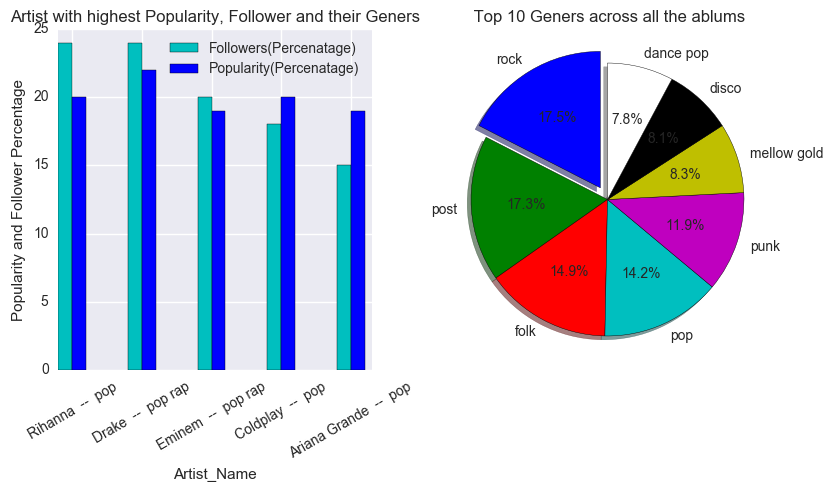

In [39]:
# plotting the GRAPG
Artist_followers = Top_Artist_f_p_gener_PERCEDNT['Artist_followers_in_percent']
Artist_popularity = Top_Artist_f_p_gener_PERCEDNT['Artist_popularity_in_percent']
Artist_name = Top_Artist_f_p_gener_PERCEDNT['Artist&Geners']
Geners = Top_Artist_f_p_gener_PERCEDNT['Geners']

fig = plt.figure(figsize=(8,5))
fig.add_subplot(1,2,1)

x = np.arange(len(Artist_name))
bar_width = 0.2
opacity = 0.5 #not so dark

a= plt.bar(x, Artist_followers,bar_width, color='c', label='Followers(Percenatage)')
b = plt.bar(x+bar_width, Artist_popularity,bar_width, color='b', label='Popularity(Percenatage)')
plt.legend()
plt.xlabel('Artist_Name')
plt.ylabel('Popularity and Follower Percentage')
plt.title("Artist with highest Popularity, Follower and their Geners")
plt.xticks(x+bar_width,Artist_name, rotation=30)
plt.tight_layout()
fig.add_subplot(1,2,2)


plt.axis('equal') 
plt.pie(Gener_Count, explode=explodegrpah, labels=Gener_Name,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(" Top 10 Geners across all the ablums")
plt.show()



### Conclusion 

- ## For Finding - 1

From the above graph its very clear that geners specifiy to artist doesnt really plays a import role in their popularity . There is no relation between the artist popularity and their geners



# Production company which made most no of albums and their count

In [42]:
album_details_for_production = album_details
album_details_for_production["Count"]=1
Top_Album_label = pd.DataFrame( album_details_for_production.groupby("Album_label",sort=True).Count.sum().reset_index())

In [44]:
Top_Album_label_sort=Top_Album_label.sort_values('Count', ascending=False)
Top_Album_label_sort_top = Top_Album_label_sort.head(10)

# most popular Album for each year 

In [45]:
album_details_tracks = album_details

In [46]:
# We are creating a data frame where we finter the data for manhattan 
album_details_for_tracks = pd.DataFrame( album_details_tracks[ (album_details_tracks.Album_popularity != 0)].reset_index())

In [47]:
release_date= album_details_for_tracks.Album_release_date

In [48]:
# WE ARE DEFINING THE FUNCTION
def try_parsing_date(text):
    for fmt in ('%Y-%m-%d','%d-%m-%Y','%m-%d-%Y', '%Y-%d-%m', '%Y', '%Y-%m', '%Y-%d'):
        try:
            datas = datetime.strptime(text, fmt).strftime('%Y')
            return datas
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [49]:
DATES=[]
for i in range (0,len(release_date)):
    date=release_date[i]
    DATES.append(try_parsing_date(date))

In [52]:
album_details_for_tracks["YEAR"]=DATES
album_details_for_tracks["YEAR"]= album_details_for_tracks["YEAR"].astype(int)
Year_wise_Album_popularity = pd.DataFrame( album_details_for_tracks.groupby("YEAR",sort=True).Album_popularity.mean().reset_index())

In [ ]:
Sorted_year= Year_wise_Album_popularity.sort_values('YEAR', ascending=True)
Sorted_year_filtered = pd.DataFrame( Sorted_year[ (Sorted_year.YEAR >= 1960)].reset_index())

# Analysis oin the review_details

# Person who gave most no of reviews 

In [61]:
review_details["Count"]=1
Top_Reviewer = pd.DataFrame( review_details.groupby("ReviewerID",sort=True).Count.sum().reset_index())

Top_Reviewer_sort=Top_Reviewer.sort_values('Count', ascending=False)
Top10_Reviewer_sort= Top_Reviewer_sort
review_details_null= review_details[review_details.ReviewerName.notnull()].reset_index()
Reviewer_Name_ID =review_details_null[["ReviewerID","ReviewerName"]].copy()

In [62]:
Reviewer_Name_ID_uniqe= Reviewer_Name_ID.drop_duplicates()

In [63]:
Name = pd.merge(Top10_Reviewer_sort,Reviewer_Name_ID_uniqe, on ="ReviewerID")

In [64]:
# We are creating a data frame where we finter the data for newyork 
Reviwer_Greater_300 =pd.DataFrame( Name[Name.Count >= 300].reset_index())

In [65]:
Reviwer_Greater_300_filtered =Reviwer_Greater_300[["ReviewerName","Count"]].copy()

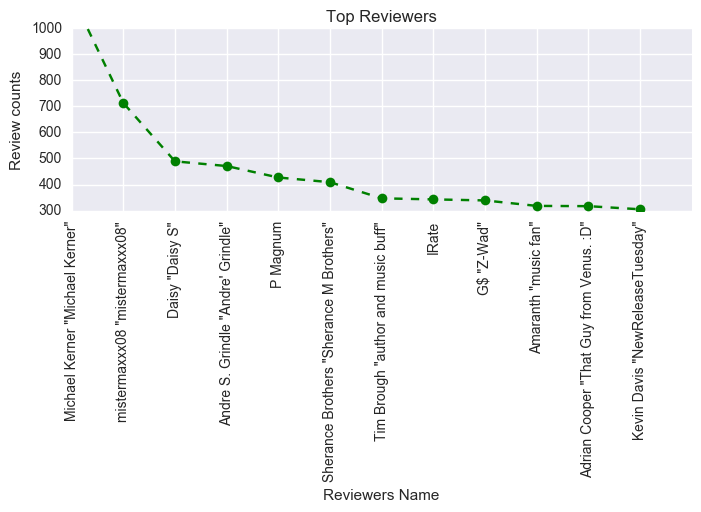

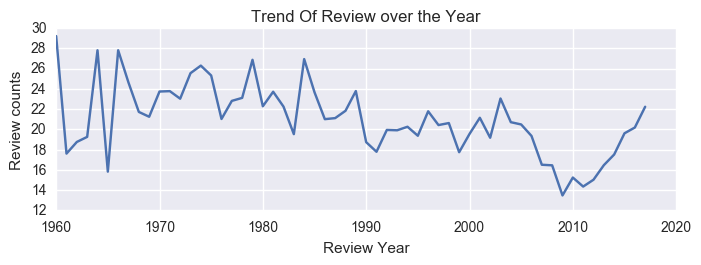

In [66]:
fig = plt.figure(figsize=(8,8))

fig = plt.figure(figsize=(8,8))

fig.add_subplot(3,1,1)


Counts = Reviwer_Greater_300_filtered['Count']
a2 = range(0,len(Reviwer_Greater_300_filtered['ReviewerName']))
xlabelss = np.array(Reviwer_Greater_300_filtered['ReviewerName'])
plt.plot(a2,Counts,marker='o', linestyle='--', color='g' )
plt.xticks(a2,xlabelss,rotation=90)
plt.ylim(300,1000)
plt.xlabel('Reviewers Name')
plt.ylabel('Review counts')
plt.title("Top Reviewers")
plt.show()

fig = plt.figure(figsize=(8,8))
fig.add_subplot(3,1,2)


xyear= Sorted_year_filtered["YEAR"]
yvalue= Sorted_year_filtered["Album_popularity"]
plt.plot(xyear,yvalue)

plt.xlabel('Review Year')
plt.ylabel('Review counts')
plt.title("Trend Of Review over the Year")


plt.show()





### Conclusion 

- ## For  Finding - 2

-From the above graph we can infere that Over the period of time the count of people give review has been reduced        
-From the above graph we can seen that "Michael and mistermax gave most no of reviews nearly 1000 reviews "



In [68]:

market_null= album_details[album_details.Available_markets.notnull()].reset_index()
market=market_null.Available_markets

In [69]:
# WE ARE CREATING ALSIT 
countrycode= []
for i in range(0,len(market)):
    conv= str(market[i])
    a=conv.split("-")
    for n in range(0,len(a)):
        b= a[n]
        countrycode.append(b)

In [70]:
# WE ARE CREATING DICTIONALRY 
Contry_dic ={}
for word in countrycode: 
    word = word.strip()
    if word not in Contry_dic:
        Contry_dic [word] = 1   # Adding to the dictionary if the words are not present 
    else:
        Contry_dic[word] += 1  # incrementing the count if the are present in the  dictionary 

In [71]:
Contry_dic_sort = sorted(Contry_dic.items(), key=itemgetter(1),reverse=True) 
country_name_list=[]
country_density_list=[]
for i in range(0,len(Contry_dic_sort)):
    a= Contry_dic_sort[i]
    country_name_list.append(a[0])
    country_density_list.append(a[1])

In [74]:
Country_and_Album_avaliablity = pd.DataFrame({"Country_name" :country_name_list,"Album_avaliablity":country_density_list})
countrywithname = pd.merge(country_details,Country_and_Album_avaliablity , on="Country_name") 
countrywithname_sort=countrywithname.sort_values('Album_avaliablity', ascending=False)

In [75]:
Top_10_country= countrywithname_sort.head(7)

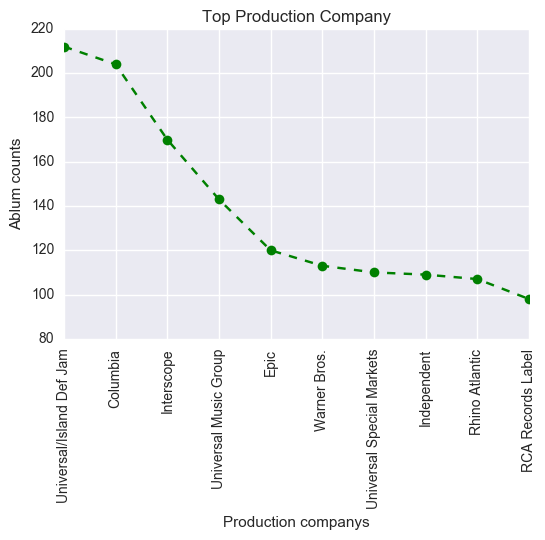

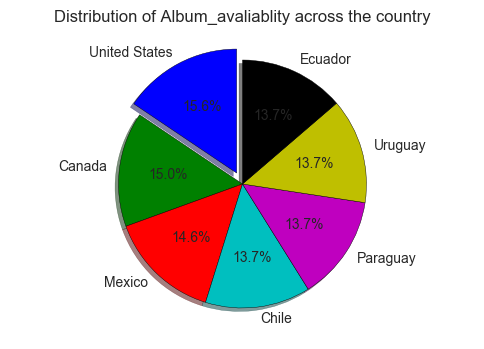

In [77]:
# First Plot
fig.add_subplot(3,1,1)


Count = Top_Album_label_sort_top['Count']
a = range(0,len(Top_Album_label_sort_top['Album_label']))
xlabels = np.array(Top_Album_label_sort_top['Album_label'])
plt.plot(a,Count,marker='o', linestyle='--', color='g' )
plt.xticks(a,xlabels,rotation=90)
plt.xlabel('Production companys')
plt.ylabel('Ablum counts')
plt.title("Top Production Company")

plt.show()



Top_10_country_name = Top_10_country['Name'] # x axis for first graph
Top_10_country_Count = Top_10_country['Album_avaliablity']
explodegrpahs =[0.1,0.0,0.0,0.0,0.0,0.0,0.0]

plt.axis('equal') 
plt.pie(Top_10_country_Count, explode=explodegrpahs, labels=Top_10_country_name,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Distribution of Album_avaliablity across the country")



### Conclusion 


- ## For  Finding - 3

-From the above graph we can infere that most no of album are sold in the us.So if artist lauch a new ablum he shuld consider us  
-From the above graph we can seen that "Universal and columbia gave most no of albums. So if artist lauch a new ablum he can approch these company for the production
